In [283]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


2024-12-19 11:39:34.980830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [284]:

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [102]:
response = pd.read_csv('drug_response_classifications.csv')
response

,Sample ID,Dataset,Response
0,PIK3CA-1113,MGH_Alpelisib,Responder
1,MGHCC1099,MGH_Ribociclib,Responder
2,MGHCC1573,MGH_Ribociclib,Non-responder
3,PIK3CA-0036,MGH_Alpelisib,Responder
4,PIK3CA-1039,MGH_Alpelisib,Responder
...,...,...,...
1002,Pt92_On,Anti-PD1,Non-responder
1003,Pt93_On,Anti-PD1,Non-responder
1004,Pt94_On,Anti-PD1,Responder
1005,Pt98_On,Anti-PD1,Non-responder


In [267]:
df_1 = pd.read_csv('Trastuzumab.csv')
df_2 = pd.read_csv('Trastuzumab_2.csv')
df_3 = pd.read_csv('Trastuzumab_3.csv')
df_4 = pd.read_csv('Trastuzumab_4.csv')
df_5= pd.read_csv('Trastuzumab_5.csv')
df_6= pd.read_csv('MK2206.csv')
df_7= pd.read_csv('Anti-PD1_4.csv')
df_8= pd.read_csv('Lapatinib.csv')
df_9= pd.read_csv('MGH_Ribociclib.csv')
df_10= pd.read_csv('MGH_Alpelisib.csv')



In [268]:
df_5_log = np.log2(df_5.drop(columns= ['index']) +1)
df_5_log ['index'] = df_5['index'] 
df_5 = df_5_log

In [269]:
df_9_log = np.log2(df_9.drop(columns= ['index']) +1)
df_9_log ['index'] = df_9['index'] 
df_9 = df_9_log

In [270]:
df_10 = df_10.rename(columns={'Unnamed: 0': 'index'})
df_10_log  = np.log2(df_10.drop(columns= ['index']) +1)
df_10_log ['index'] = df_10['index'] 
df_10 = df_10_log

In [271]:
df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7,df_8, df_9,df_10]
transformed_dfs = []
for i, df_i in enumerate(df_list, start=1):
    df_i_transposed = df_i.set_index('index').T
    df_i_transposed = df_i_transposed.reset_index()
    df_i_transposed = df_i_transposed.rename(columns={'index': 'Sample ID'})
    transformed_dfs.append(df_i_transposed)
df_merged = pd.concat(transformed_dfs, axis=0, ignore_index=True, join='outer')

In [272]:
df_merged = df_merged.merge(response[['Sample ID', 'Response']], on='Sample ID', how='left')
df_merged

,Sample ID,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,...,ZSWIM5P2,ZSWIM5P3,ZSWIM8-AS1,ZYG11AP1,ZYXP1,hsa-mir-1253,hsa-mir-423,snoZ196,OR7E11P,Response
0,GSM1232994,2.906162,6.034577,3.767476,12.004274,4.284767,2.577574,4.012231,4.910583,1.815982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
1,GSM1232996,2.585542,6.341333,3.614123,12.658412,4.876153,2.802240,3.413455,4.832880,1.604818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
2,GSM1232997,2.589861,6.210598,4.044349,12.118935,3.802686,2.761787,3.236598,4.952172,1.715567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
3,GSM1232998,2.913350,6.098998,3.956625,12.980047,5.351633,2.776618,3.309193,4.955024,1.727895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
4,GSM1232999,2.470877,5.875681,3.581188,11.579897,4.017873,2.930999,3.053191,4.916770,1.690249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,PIK3CA-2179,0.823749,0.000000,0.000000,4.066089,0.650765,0.000000,0.000000,1.304511,0.000000,...,0.000000,0.000000,0.903038,0.000000,0.0,0.0,0.0,0.0,0.000000,Responder
409,PIK3CA-1039,0.000000,0.000000,1.495327,1.507651,2.792072,0.000000,0.000000,3.273681,0.000000,...,0.000000,3.246740,0.000000,0.000000,0.0,0.0,0.0,0.0,1.946082,Responder
410,PIK3CA-1676,0.276147,0.585027,0.150314,4.756887,1.100748,0.528155,0.240192,1.361856,0.161632,...,0.390069,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.389567,Responder
411,PIK3CA-1035,1.020242,1.890757,4.667178,6.920248,1.861841,0.252829,0.754252,0.626897,0.598030,...,0.534431,0.000000,0.000000,0.628415,0.0,0.0,0.0,0.0,0.291434,Non-responder


In [273]:
duplicate_counts = df_merged['Sample ID'].value_counts()
print(duplicate_counts[duplicate_counts > 1])

Series([], Name: count, dtype: int64)


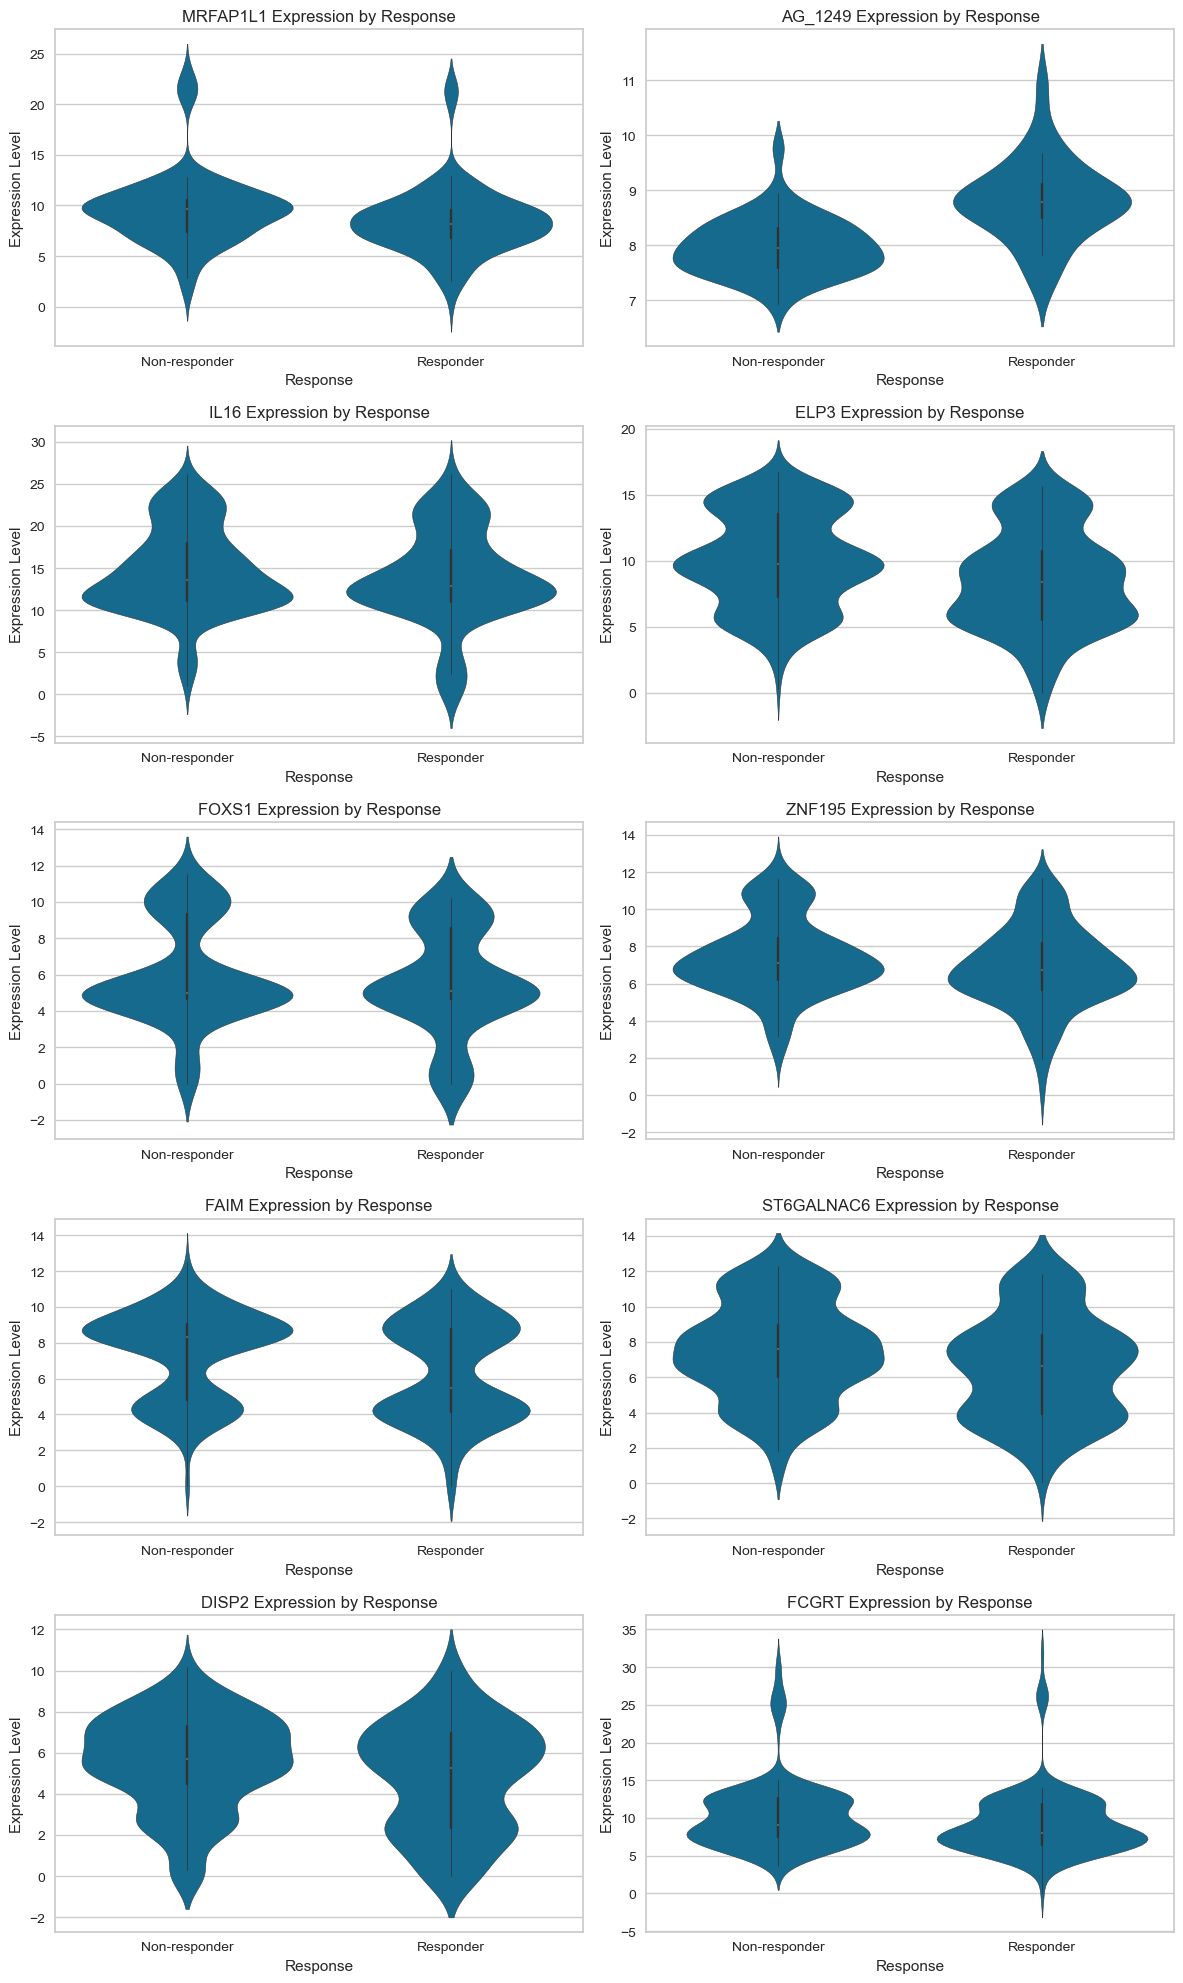

In [190]:
top10_gene = ['MRFAP1L1', 'AG_1249', 'IL16', 'ELP3', 'FOXS1', 'ZNF195', 'FAIM', 'ST6GALNAC6', 'DISP2', 'FCGRT']
fig, axes = plt.subplots(5, 2, figsize=(12, 20))  # 5 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array to easily iterate over

# Loop through the top10_gene list and plot each gene's expression in a subplot
for i, gene in enumerate(top10_gene):
    sns.violinplot(x=df_merged['Response'], y=df_merged[gene], ax=axes[i])
    axes[i].set_title(f'{gene} Expression by Response')
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel('Expression Level')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [274]:
df_merged['Response'] = df_merged['Response'].map({'Non-responder':0,'Responder':1})

In [275]:
df_merged['Response'].value_counts()

Response
0.0    243
1.0    167
Name: count, dtype: int64

In [276]:
df_merged.loc[df_merged.Response.isna()==True]

,Sample ID,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,...,ZSWIM5P2,ZSWIM5P3,ZSWIM8-AS1,ZYG11AP1,ZYXP1,hsa-mir-1253,hsa-mir-423,snoZ196,OR7E11P,Response
387,MGHCC1101,4.947132,5.292472,0.307244,5.186473,1.701837,0.000000,0.0,3.633205,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
391,MGHCC1108,0.884719,1.846394,0.000000,7.092708,2.430091,0.180557,0.0,2.433281,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
393,MGHCC0002,0.000000,2.935005,0.000000,6.544484,2.729125,0.000000,0.0,2.344290,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [277]:
response.loc[response['Sample ID'].isin(['MGHCC0002','MGHCC1108','MGHCC1101'])]

,Sample ID,Dataset,Response


In [278]:
df_merged = df_merged[~df_merged['Sample ID'].isin(['MGHCC0002', 'MGHCC1108', 'MGHCC1101'])]

In [279]:
df_merged = df_merged.loc[:, df_merged.isna().sum() <= 350]

In [280]:
df_merged.fillna(0, inplace=True)

In [282]:
df_merged.to_csv('breast_cancer_mRNA_data.csv', index=False)

# Exploratory Data Analysis (EDA)

## Feature Engineering

## Identify the top 10 feature genes

In [152]:
df_merged.columns

Index(['Sample ID', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1',
       'A2MP1', 'A4GALT', 'A4GNT',
       ...
       'ZNF735P', 'ZNF737', 'ZNF788', 'ZNF815P', 'ZNF816-ZNF321P', 'ZNF833P',
       'ZNF847P', 'ZNF878', 'ZSCAN5B', 'Response'],
      dtype='object', length=27549)

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import make_column_transformer  
from sklearn.pipeline import make_pipeline  

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [228]:
ckap2_columns = df_merged.filter(like='CKAP2').columns.tolist()

# Get columns containing any of the IGL-related genes
ig_columns = df_merged.filter(like='IGLC').columns.tolist() + \
             df_merged.filter(like='IGLV').columns.tolist() + \
             df_merged.filter(like='IGLJ').columns.tolist()

# Find columns that contain both 'CKAP2' and any of the IGL-related genes
ckap2_ig_columns = [
    col for col in ckap2_columns if any(ig in col for ig in ig_columns)
]
ckap2_ig_columns

['CKAP2 /// DKFZp667J0810 /// IGLC1 /// IGLJ2 /// IGLJ2 /// IGLJ3 /// IGLJ3 /// IGLJ3 /// IGLV1-36 /// IGLV1-36 /// IGLV1-44 /// IGLV1-50 /// IGLV1-50 /// IGLV@',
 'CKAP2 /// IGLC1 /// IGLJ2 /// IGLJ2 /// IGLJ3 /// IGLJ3 /// IGLJ3 /// IGLV1-44 /// IGLV2-14 /// IGLV@',
 'CKAP2 /// IGLC1 /// IGLJ2 /// IGLJ2 /// IGLJ3 /// IGLJ3 /// IGLJ3 /// IGLV3-1 /// IGLV3-1 /// IGLV@',
 'CKAP2 /// IGLC1 /// IGLV1-40 /// IGLV1-40 /// IGLV1-50 /// IGLV1-50',
 'CKAP2 /// IGLC1 /// IGLV3-1 /// IGLV3-1 /// IGLV@',
 'CKAP2 /// IGLJ3 /// IGLV3-19 /// IGLV3-19']

In [229]:
df_merged['CKAP2_IG'] = df_merged[ckap2_ig_columns].mean(axis=1)
df_merged.drop(columns=ckap2_ig_columns, inplace=True)

In [232]:
ig_columns = df_merged.filter(like='IGLC').columns.tolist() + \
             df_merged.filter(like='IGLV').columns.tolist() + \
             df_merged.filter(like='IGLJ').columns.tolist()
df_merged['IGs'] = df_merged[ig_columns].mean(axis=1)
df_merged.drop(columns=ig_columns, inplace=True)

In [233]:

X = df_merged.drop(columns=['Sample ID','Response'], axis=1)
y = df_merged['Response']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [234]:
# Get feature importance from the trained model
feature_importance = rf.feature_importances_

# Create a DataFrame with gene names (assuming columns in X are gene names)
feature_df = pd.DataFrame({
    'Gene': X.columns,  # Assuming X is a DataFrame with gene names as columns
    'Importance': feature_importance
})

# Sort by importance in descending order
top_genes = feature_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 10 important genes
print(top_genes)

               Gene  Importance
25975       AG_3500    0.002772
3356          CD226    0.001939
26004       AG_3962    0.001715
20357          SUOX    0.001640
11811  LOC101929272    0.001569
6124           ESPN    0.001558
5362        DNAJC12    0.001558
25988       AG_3631    0.001542
15741          PIN1    0.001529
10930  LOC100289283    0.001523


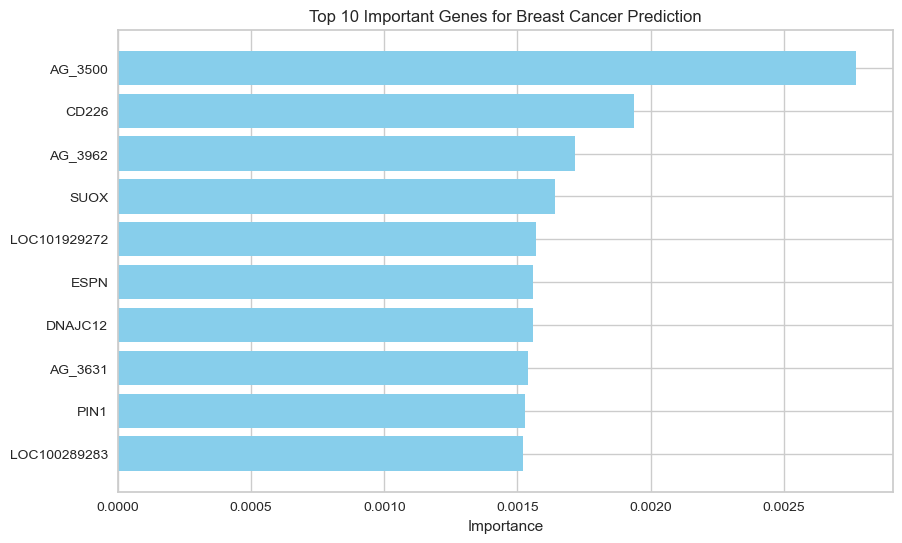

In [235]:
# Plot the top 10 important genes
plt.figure(figsize=(10, 6))
plt.barh(top_genes['Gene'], top_genes['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Important Genes for Breast Cancer Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important gene at the top
plt.show()

In [236]:
genes=[]
for gene in top_genes.Gene:
    genes.append(gene)

print(genes)


['AG_3500', 'CD226', 'AG_3962', 'SUOX', 'LOC101929272', 'ESPN', 'DNAJC12', 'AG_3631', 'PIN1', 'LOC100289283']


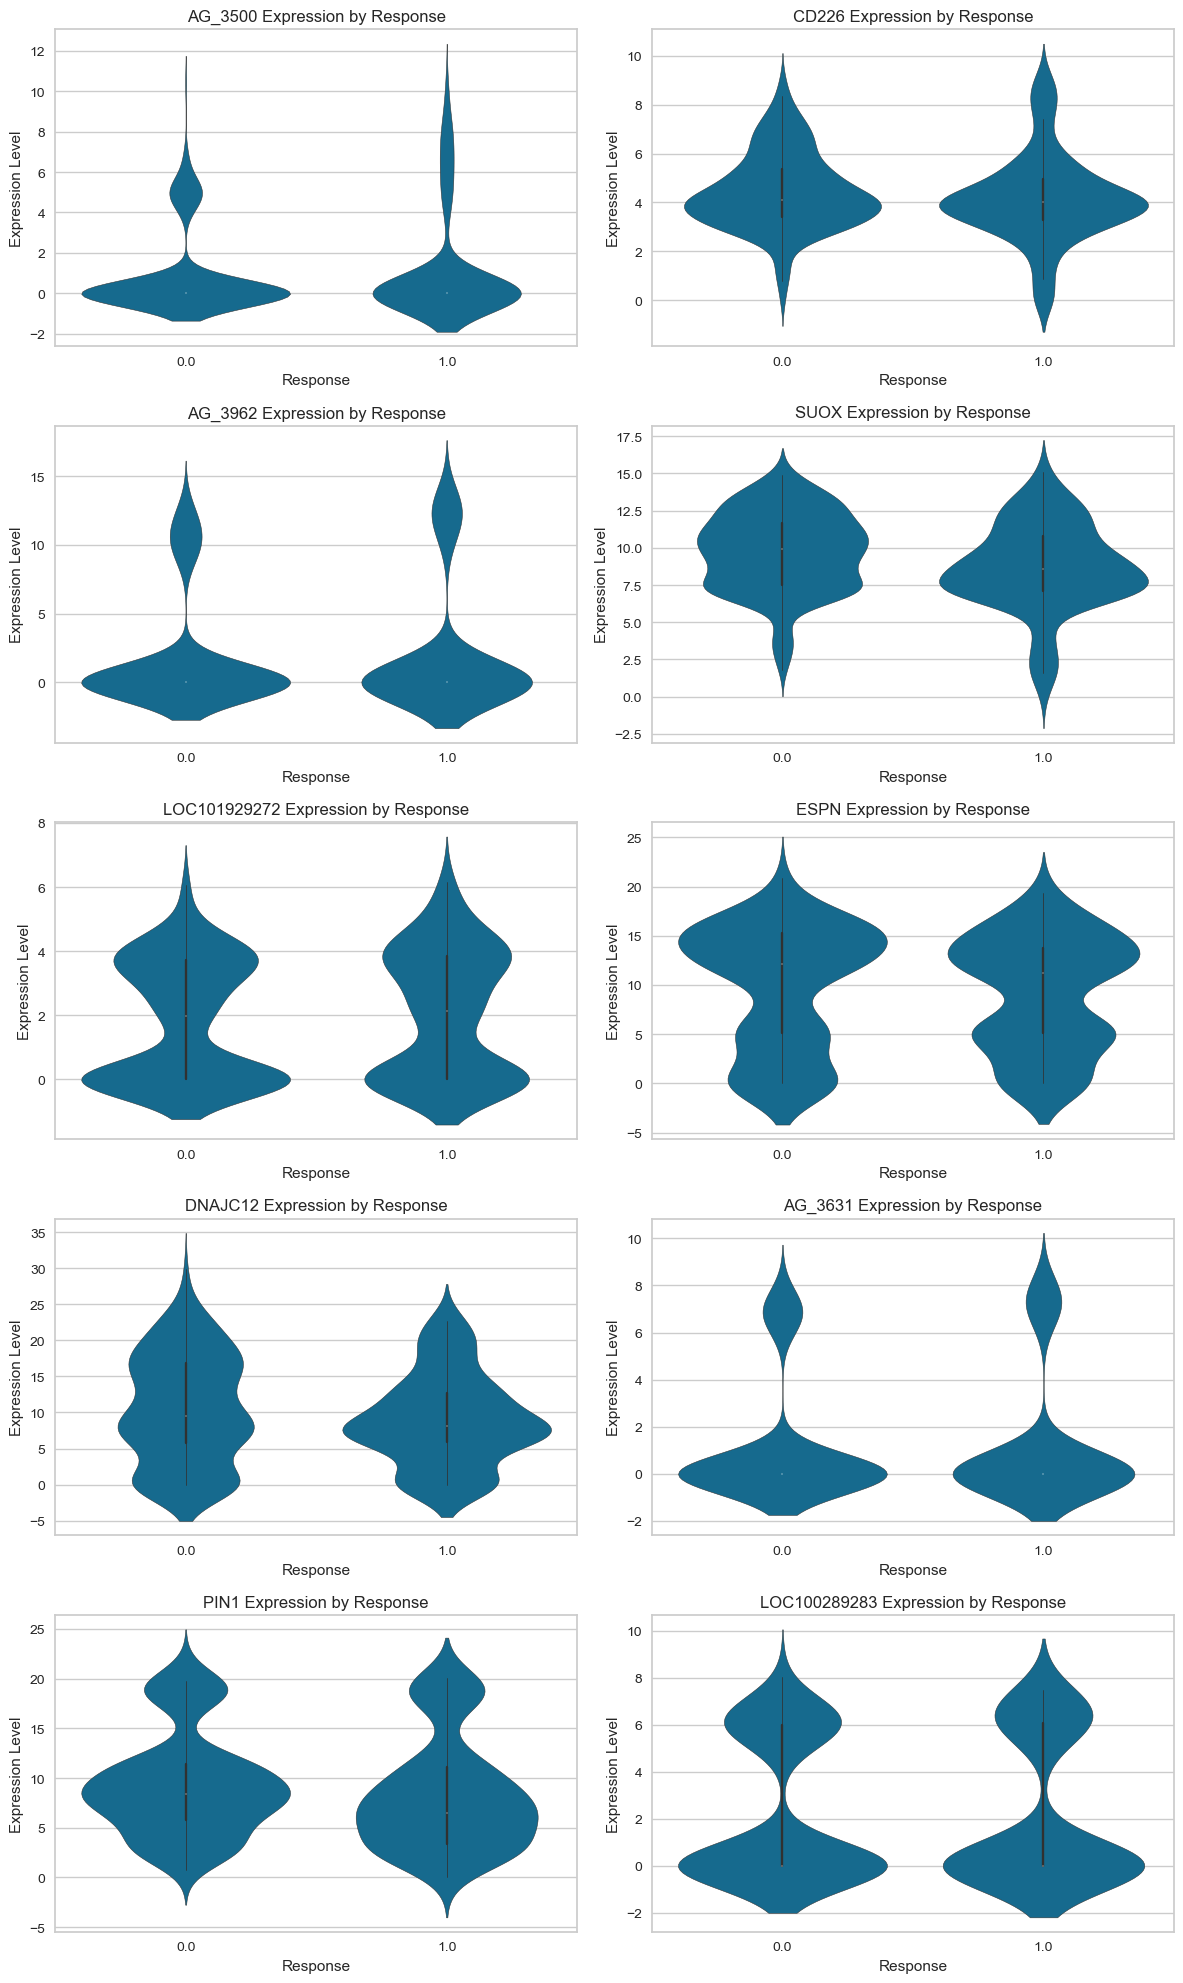

In [237]:
top10_gene = genes
fig, axes = plt.subplots(5, 2, figsize=(12, 20))  # 5 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array to easily iterate over

# Loop through the top10_gene list and plot each gene's expression in a subplot
for i, gene in enumerate(top10_gene):
    sns.violinplot(x=df_merged['Response'], y=df_merged[gene], ax=axes[i])
    axes[i].set_title(f'{gene} Expression by Response')
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel('Expression Level')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [159]:
genes_of_interest = [
    "ERBB2", "BRCA1", "BRCA2", "TP53", "ER", "PR", "Ki-67", "EGFR", 
    "CTLA4", "CD44", "MMPs", "PIK3CA", "FOXM1", "AKT1", "PTEN"
]

genes_in_data = [gene for gene in genes_of_interest if gene in df_merged.index]
genes_in_data

[]

## Dimensionality Reduction (PCA)

In [238]:
X = df_merged.drop(columns=['Sample ID','Response'], axis=1)
scaler = StandardScaler()
decomp = PCA(n_components = 0.9)
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9))])

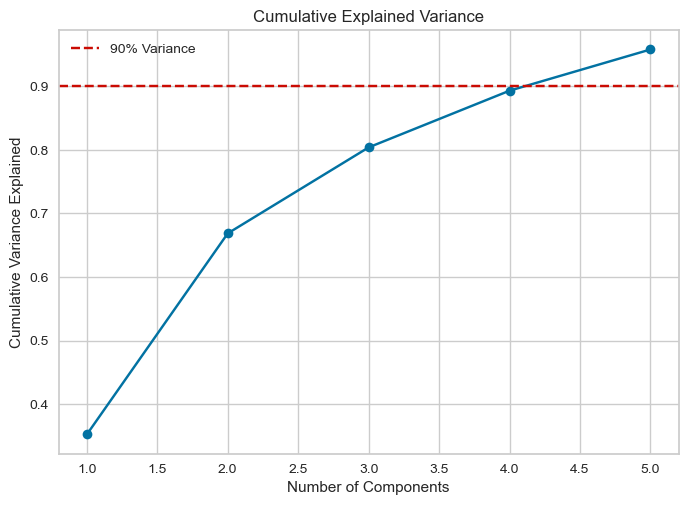

In [239]:

pca = pipe.named_steps['pca']

cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.show()

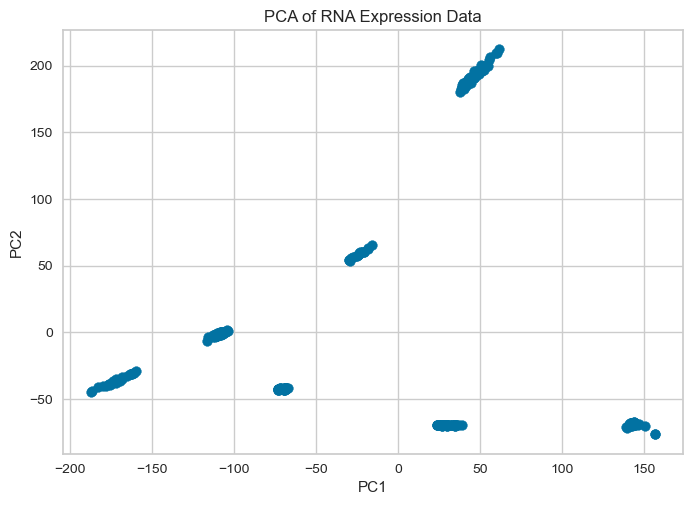

In [240]:
pca_result = pipe.transform(X)

# Now, plot the first two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of RNA Expression Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [241]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {pca.explained_variance_ratio_.cumsum()}")

Explained variance ratio: [0.35275213 0.31598791 0.13514561 0.08910088 0.06477065]
Cumulative explained variance: [0.35275213 0.66874004 0.80388565 0.89298652 0.95775717]


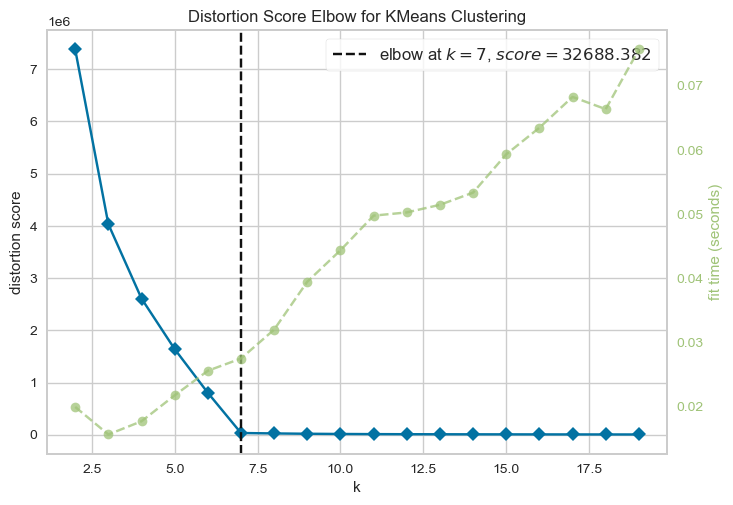

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [242]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KElbowVisualizer(KMeans(n_init=20),k=(2, 20))  # how many times the model runs, 10 is the default value
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)
pipe[2].show()

In [243]:
scaler = StandardScaler()
decomp = PCA(n_components=.9)
cluster = KMeans(n_init=10, n_clusters=7)
pipe= make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=7, n_init=10))])

In [244]:
values = pipe[:2].transform(X)
pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
df_merged_pca = df_merged.join(pd.DataFrame(values, columns=pca_labels))

df_merged_pca['clusters'] = pipe['kmeans'].labels_

In [245]:
df_merged_pca.columns

Index(['Sample ID', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1',
       'A2MP1', 'A4GALT', 'A4GNT',
       ...
       'ZSCAN5B', 'Response', 'CKAP2_IG', 'IGs', 'PC1', 'PC2', 'PC3', 'PC4',
       'PC5', 'clusters'],
      dtype='object', length=27535)

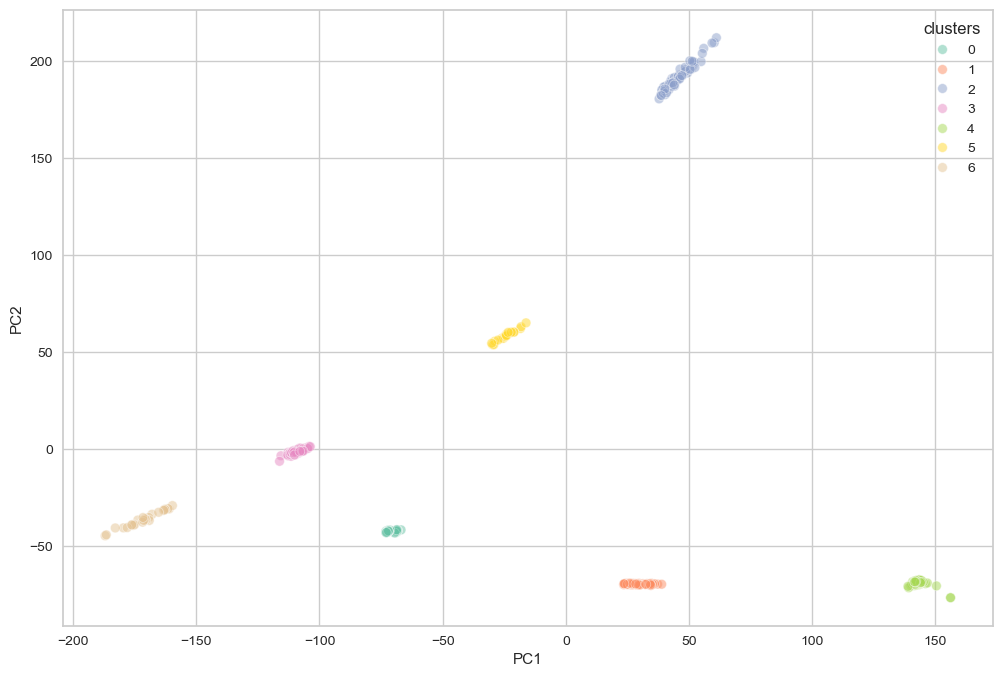

In [246]:
plt.figure(figsize=(12,8))
g = sns.scatterplot(data=df_merged_pca, x="PC1", y="PC2", hue="clusters", alpha=0.5, palette="Set2")


<Axes: xlabel='clusters', ylabel='count'>

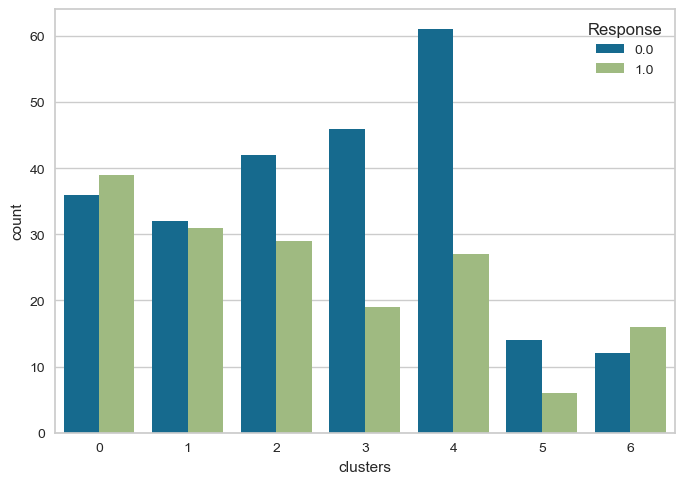

In [247]:
sns.countplot(x = "clusters", hue='Response', data=df_merged_pca)


# 3. Machine learning model to predict drug response

In [173]:
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import make_column_transformer  
from sklearn.pipeline import make_pipeline  

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## ML with PCA 

In [248]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)
y = df_merged['Response']  

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [249]:
classifier_scale = [SVC(),
                     KNeighborsClassifier(),
                     GradientBoostingClassifier(n_estimators=100, random_state=42)]

classifier_not_scale = [LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier()]
    
scaler = StandardScaler()

In [251]:
for classifier in classifier_scale:
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
    
    # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    print(f'{classifier} Accuracy: {accuracy * 100:.2f}%')
    print("Classification Report:")
    print(classification_report(y_train, y_pred))

# Evaluate regressors that do not require scaling
for classifier in classifier_not_scale:
    pipe = make_pipeline(classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
     # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    print(f'{classifier} Accuracy: {accuracy * 100:.2f}%')
    print("Classification Report:")
    print(classification_report(y_train, y_pred))

SVC() Accuracy: 60.67%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       199
         1.0       0.00      0.00      0.00       129

    accuracy                           0.61       328
   macro avg       0.30      0.50      0.38       328
weighted avg       0.37      0.61      0.46       328

KNeighborsClassifier() Accuracy: 74.39%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80       199
         1.0       0.70      0.62      0.66       129

    accuracy                           0.74       328
   macro avg       0.73      0.72      0.73       328
weighted avg       0.74      0.74      0.74       328



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GradientBoostingClassifier(random_state=42) Accuracy: 92.38%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       199
         1.0       1.00      0.81      0.89       129

    accuracy                           0.92       328
   macro avg       0.94      0.90      0.92       328
weighted avg       0.93      0.92      0.92       328

LogisticRegression() Accuracy: 61.59%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.97      0.75       199
         1.0       0.60      0.07      0.12       129

    accuracy                           0.62       328
   macro avg       0.61      0.52      0.44       328
weighted avg       0.61      0.62      0.51       328

DecisionTreeClassifier() Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00   

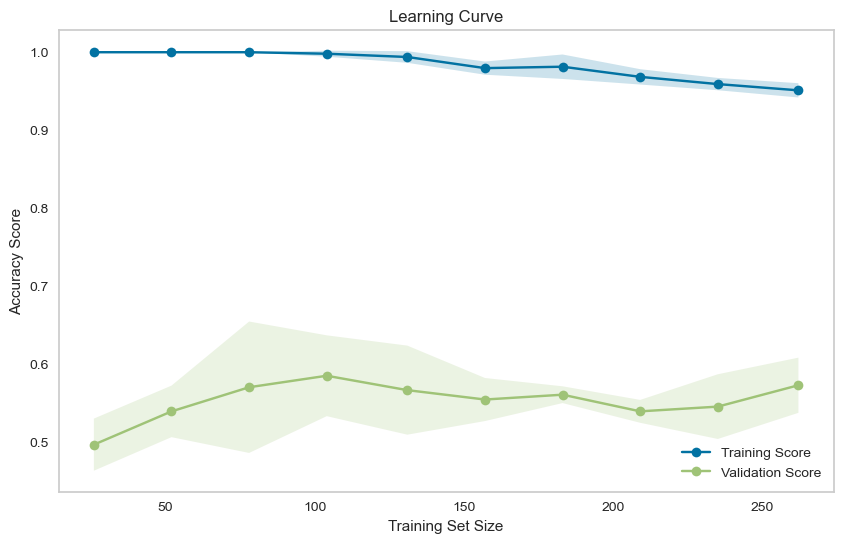

In [252]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, random_state=42))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Score", marker='o')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

## ML with original X

In [253]:
X = df_merged.drop(columns=['Sample ID','Response'], axis=1)
y = df_merged['Response']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [254]:
classifier_scale = [SVC(),
                     KNeighborsClassifier(),
                     GradientBoostingClassifier(n_estimators=100, random_state=42)]

classifier_not_scale = [LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier()]
    
scaler = StandardScaler()

In [263]:
for classifier in classifier_scale:
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
    
    # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    print(f'{classifier} Accuracy: {accuracy * 100:.2f}%')
    print("Classification Report:")
    print(classification_report(y_train, y_pred))

# Evaluate regressors that do not require scaling
for classifier in classifier_not_scale:
    pipe = make_pipeline(classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
     # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    print(f'{classifier} Accuracy: {accuracy * 100:.2f}%')
    print("Classification Report:")
    print(classification_report(y_train, y_pred))
 
  

SVC() Accuracy: 60.98%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       199
         1.0       1.00      0.01      0.02       129

    accuracy                           0.61       328
   macro avg       0.80      0.50      0.39       328
weighted avg       0.76      0.61      0.47       328

KNeighborsClassifier() Accuracy: 75.91%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       199
         1.0       0.71      0.66      0.68       129

    accuracy                           0.76       328
   macro avg       0.75      0.74      0.74       328
weighted avg       0.76      0.76      0.76       328

GradientBoostingClassifier(random_state=42) Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00      1.00      1.00

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00      1.00      1.00       129

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1.00      1.00      1.00       328

DecisionTreeClassifier() Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00      1.00      1.00       129

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1.00      1.00      1.00       328

RandomForestClassifier() Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00      1.00      1.00

##  3.2 Trianing and Evaluation of Model Performance

### SVC

In [262]:
svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],  # Uniform distribution between 0.1 and 100
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_}")

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.6802331002331002


In [266]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'cosine']
}

# Instantiate the model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a callable function.

In [ ]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, random_state=42))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Score", marker='o')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()